<a href="https://colab.research.google.com/github/saif9402/Dr-Wessam-Project/blob/main/word_embedding_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"marnunaatef","key":"ee2ced2020c7862bac116bfd08a12486"}'}

In [ ]:
import os
import zipfile

# Create kaggle directory and move kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json



In [ ]:
!kaggle datasets download -d anupampaul005/fake-news-dataset


Dataset URL: https://www.kaggle.com/datasets/anupampaul005/fake-news-dataset
License(s): MIT


In [ ]:
with zipfile.ZipFile("fake-news-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("fake_news")


In [ ]:
import pandas as pd

df = pd.read_csv("fake_news/dataset.csv")  # Update filename if different
df.head()


,title,text,unreliable,author
0,WARNING: A Pivotal Moment For The Stock Market...,WARNING: A Pivotal Moment For The Stock Market...,1,Anonymous Coward (UID 72071746)
1,"Trump, top defense officials, discuss North Ko...",WASHINGTON - U.S. President Donald Trump met ...,0,Unknown
2,British civil servants' union calls nationwide...,LONDON - British civil servants will vote nex...,0,Unknown
3,A**hole Of The Day – Michele Bachmann: Muslim...,Michele Bachmann has been pretty quiet since l...,1,Unknown
4,’Deport Fat People’ Posters Appear At CU Bould...,Posters calling on Donald Trump to “Deport Fat...,0,Lucas Nolan


In [ ]:
df['content'] = df['title'].fillna('') + ' ' + df['text'].fillna('')


In [ ]:
df['label'] = df['unreliable']

# Check result
print(df[['title', 'text', 'content', 'label']].head())

                                               title  \
0  WARNING: A Pivotal Moment For The Stock Market...   
1  Trump, top defense officials, discuss North Ko...   
2  British civil servants' union calls nationwide...   
3   A**hole Of The Day – Michele Bachmann: Muslim...   
4  ’Deport Fat People’ Posters Appear At CU Bould...   

                                                text  \
0  WARNING: A Pivotal Moment For The Stock Market...   
1  WASHINGTON  - U.S. President Donald Trump met ...   
2  LONDON  - British civil servants will vote nex...   
3  Michele Bachmann has been pretty quiet since l...   
4  Posters calling on Donald Trump to “Deport Fat...   

                                             content  label  
0  WARNING: A Pivotal Moment For The Stock Market...      1  
1  Trump, top defense officials, discuss North Ko...      0  
2  British civil servants' union calls nationwide...      0  
3   A**hole Of The Day – Michele Bachmann: Muslim...      1  
4  ’Deport Fat P

In [ ]:
import re, string, nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r'\d+', '', text)
    words = [w for w in text.split() if w not in stop_words]
    words = [lemmatizer.lemmatize(w) for w in words]
    return ' '.join(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df['cleaned_content'] = df['content'].apply(preprocess)

#  STEP 9: Remove short documents (<5 words)
df = df[df['cleaned_content'].str.split().str.len() > 5]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
# ---------------- STEP 1: Tokenization ----------------
VOCAB_SIZE = 10000  # Number of unique words to keep
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_content'])

#  Verify tokenization
print("Tokenization completed.")
print(f"Total unique words in word_index: {len(tokenizer.word_index)}")
print(" Word Index Mapping (First 10 words):")
for word, index in list(tokenizer.word_index.items())[:10]:
    print(f"{word}: {index}")


Tokenization completed.
Total unique words in word_index: 403244
 Word Index Mapping (First 10 words):
<OOV>: 1
said: 2
trump: 3
u: 4
state: 5
would: 6
president: 7
mr: 8
people: 9
one: 10


In [ ]:
# ---------------- STEP 2: Text to sequences ----------------
sequences = tokenizer.texts_to_sequences(df['cleaned_content'])

#  Verify sequences
print("\n Tokenized Sequence (Example):")
print(sequences[0])



 Tokenized Sequence (Example):
[1172, 6932, 625, 1338, 372, 47, 1172, 6932, 625, 1338, 372, 47, 676, 2147, 155, 152, 642, 1, 1407, 1, 2187, 7023, 1886, 147, 7895, 1, 679, 2665, 5778, 5998, 1]


In [ ]:
# ---------------- STEP 3: Padding sequences ----------------
MAX_SEQUENCE_LENGTH = 200
X_padded = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
# Save a copy for LSTM
X_lstm = X_padded.copy()
#  Verify padding
print("\n Padded Sequence (Example):")
print(X_padded[0])
print("Length of padded sequence:", len(X_padded[0]))
#  Verify padding
print("\n Padded Sequence (Example):")
print(X_lstm[0])
print("Length of padded sequence:", len(X_padded[0]))


 Padded Sequence (Example):
[1172 6932  625 1338  372   47 1172 6932  625 1338  372   47  676 2147
  155  152  642    1 1407    1 2187 7023 1886  147 7895    1  679 2665
 5778 5998    1    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0   

In [ ]:
# ---------------- STEP 4: Prepare labels ----------------
y = df['label'].values

#  Check shapes
print("\n Shape of padded features (X_padded):", X_padded.shape)
print(" Shape of labels (y):", y.shape)

#  Optional: Check how many labels of each class
print("\n Class distribution:")
print(pd.Series(y).value_counts())


 Shape of padded features (X_padded): (65539, 200)
 Shape of labels (y): (65539,)

 Class distribution:
1    33736
0    31803
Name: count, dtype: int64


In [ ]:
#passing the padded sequences (output of the tokenization + padding steps) into your traditional ML models like Logistic Regression, which expect numerical vectors (not embeddings) is wrong
# should convert the text data to numerical features before splitting the data — typically using TF-IDF (Term Frequency-Inverse Document Frequency) or CountVectorizer.
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer for traditional ML
count_vect = CountVectorizer(max_features=5000)
X_count = count_vect.fit_transform(df['text'].astype('U'))



In [ ]:
# STEP 5: Train/Test Split

from sklearn.model_selection import train_test_split

# Split: 80% Train, 10% Validation, 10% Test
X_train_val, X_test, y_train_val, y_test = train_test_split(X_count ,y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, random_state=42)  # 0.1111 ≈ 10% of full

# Verify splits
print("\n Data split completed.")
print(f"Training samples: {X_count.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")



 Data split completed.
Training samples: 65539
Validation samples: 6554
Testing samples: 6554


In [ ]:
# LSTM-related split (for the padded sequences)
X_train_val_lstm, X_test_lstm, y_train_val_lstm, y_test_lstm = train_test_split(X_lstm, y, test_size=0.1, random_state=42)
X_train_lstm, X_val_lstm, y_train_lstm, y_val_lstm = train_test_split(X_train_val_lstm, y_train_val_lstm, test_size=0.1111, random_state=42)  # 0.1111 ≈ 10% of full

# Verify splits for LSTM
print("\n Data split completed for LSTM.")
print(f"LSTM Training samples: {X_train_lstm.shape[0]}")
print(f"LSTM Validation samples: {X_val_lstm.shape[0]}")
print(f"LSTM Testing samples: {X_test_lstm.shape[0]}")



 Data split completed for LSTM.
LSTM Training samples: 52431
LSTM Validation samples: 6554
LSTM Testing samples: 6554


In [ ]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    # Predictions & probabilities
    probs = model.predict_proba(X_test)[:, 1]
    preds = model.predict(X_test)

    # Metrics
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = auc(fpr, tpr)

    # Print results
    print(f"\n📊 {name} Evaluation Metrics:")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy: {test_acc:.4f}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC Score: {auc_score:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
    plt.title(f'🧩 Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")
    return fpr, tpr, auc_score, name


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)



📊 Logistic Regression Evaluation Metrics:
Training Accuracy: 0.9995
Testing Accuracy: 0.9420
Accuracy: 0.9420
Precision: 0.9331
Recall: 0.9530
F1 Score: 0.9429
AUC Score: 0.9758


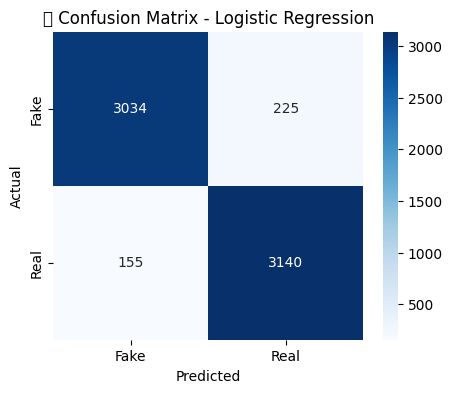

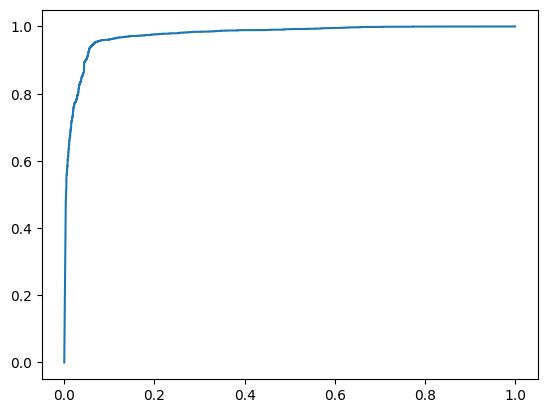

In [ ]:
roc_data = []

# Logistic Regression
log_model = LogisticRegression(C=10, penalty='l2', solver='lbfgs', max_iter=1000)
log_model.fit(X_train, y_train)
roc_data.append(evaluate_model("Logistic Regression", log_model, X_train, y_train, X_test, y_test))



📊 Random Forest Evaluation Metrics:
Training Accuracy: 1.0000
Testing Accuracy: 0.9452
Accuracy: 0.9452
Precision: 0.9440
Recall: 0.9472
F1 Score: 0.9456
AUC Score: 0.9899


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


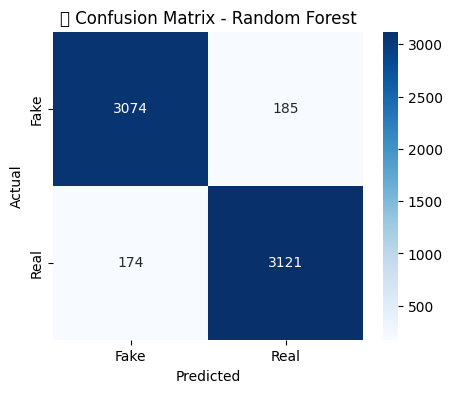

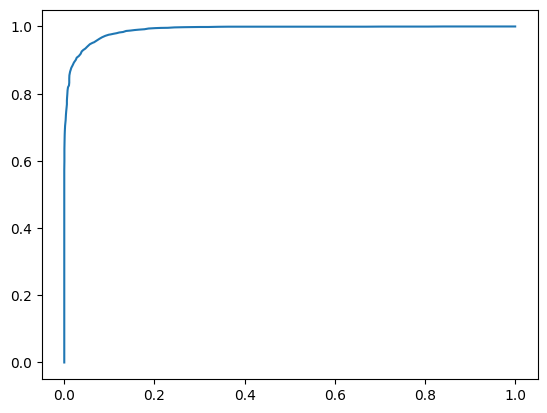

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
roc_data.append(evaluate_model("Random Forest", rf_model, X_train, y_train, X_test, y_test))



📊 Gradient Boosting Evaluation Metrics:
Training Accuracy: 0.9314
Testing Accuracy: 0.9266
Accuracy: 0.9266
Precision: 0.9284
Recall: 0.9253
F1 Score: 0.9269
AUC Score: 0.9788


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


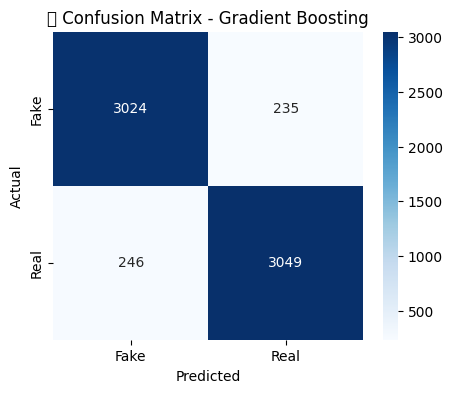

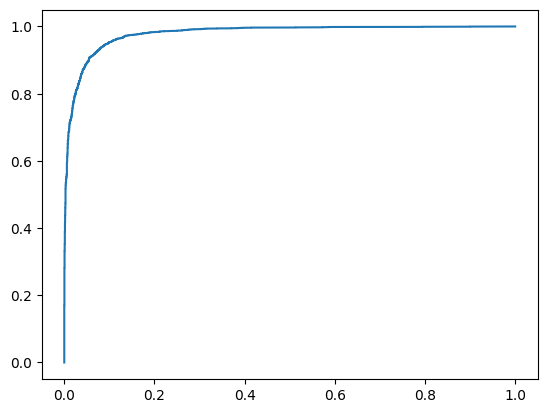

In [ ]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
roc_data.append(evaluate_model("Gradient Boosting", gb_model, X_train, y_train, X_test, y_test))

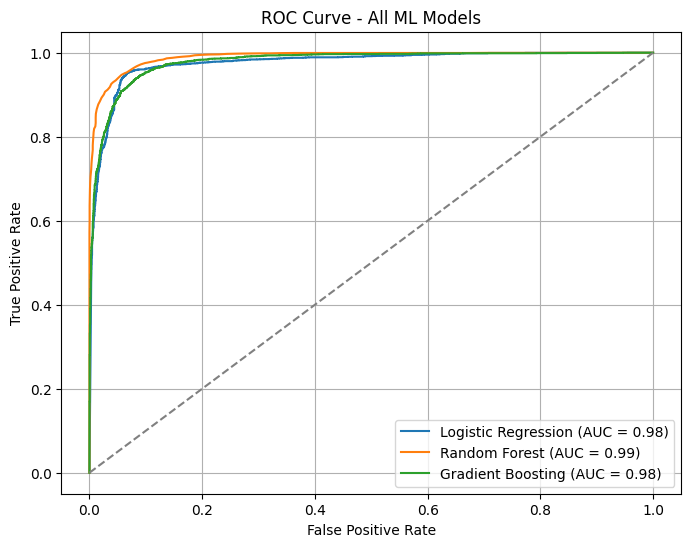

In [ ]:
# Plot all ROC curves
plt.figure(figsize=(8, 6))
for fpr, tpr, auc_score, label in roc_data:
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc_score:.2f})")

# Plot diagonal (random guess)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - All ML Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
VOCAB_SIZE = 10000
EMBEDDING_DIM = 64
MAX_SEQUENCE_LENGTH = 200


In [ ]:
model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH), #Word Embeddings is applied in the LSTM model through The Embedding layer automatically handles this conversion into word embeddings.
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
   X_train_lstm, y_train_lstm,
    validation_data=( X_val_lstm, y_val_lstm ),
    epochs=5,
    batch_size=64
)



Epoch 1/5
820/820 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.7041 - loss: 0.5533 - val_accuracy: 0.6059 - val_loss: 0.5950
Epoch 2/5
820/820 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.6612 - loss: 0.5576 - val_accuracy: 0.6959 - val_loss: 0.5380
Epoch 3/5
820/820 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7319 - loss: 0.5003 - val_accuracy: 0.7664 - val_loss: 0.4522
Epoch 4/5
820/820 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.7584 - loss: 0.4727 - val_accuracy: 0.9114 - val_loss: 0.2987
Epoch 5/5
820/820 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9118 - loss: 0.2741 - val_accuracy: 0.9397 - val_loss: 0.1979


In [ ]:
loss, accuracy = model.evaluate(X_test_lstm, y_test_lstm)
print(f" Test Accuracy: {accuracy:.4f}")


205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9330 - loss: 0.2091
 Test Accuracy: 0.9341


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt


def evaluate_dl_model(name, model, X_train, y_train, X_test, y_test, history):
    # Predict probabilities and labels
    probs = model.predict(X_test).flatten()
    preds = (probs > 0.5).astype(int)

    # Metrics
    loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    train_acc = history.history['accuracy'][-1]  # Last epoch training accuracy
    val_acc = history.history['val_accuracy'][-1]  # Last epoch val accuracy (optional)
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    # Print evaluation
    print(f"\n🔍 {name} Model Evaluation:")
    print(f"Training Accuracy (Last Epoch): {train_acc:.4f}")
    print(f"Testing Accuracy (Keras Eval): {test_acc:.4f}")
    print(f"Accuracy (Sklearn): {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC Score: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
    plt.title(f'🧩 Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

🔍 LSTM Model Evaluation:
Training Accuracy (Last Epoch): 0.9204
Testing Accuracy (Keras Eval): 0.9341
Accuracy (Sklearn): 0.9341
Precision: 0.9272
Recall: 0.9429
F1 Score: 0.9350
AUC Score: 0.9683


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


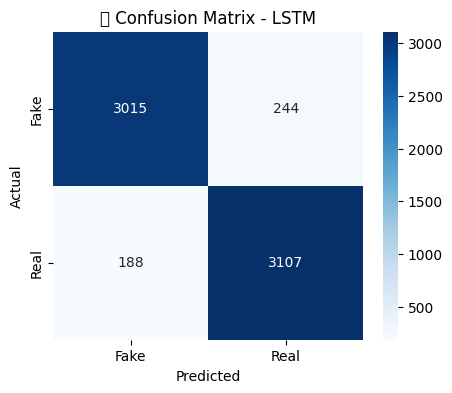

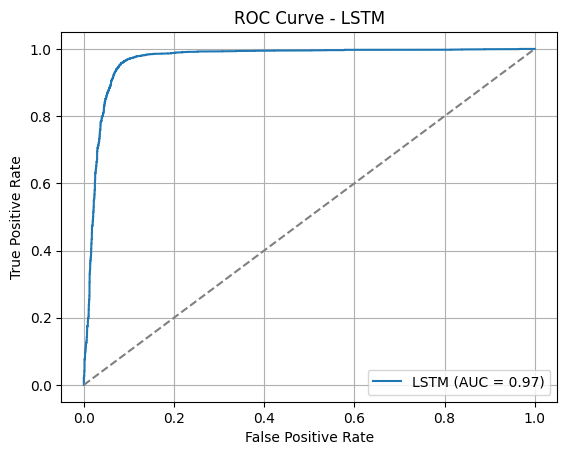

In [ ]:
evaluate_dl_model("LSTM", model, X_train_lstm, y_train_lstm, X_test_lstm, y_test_lstm , history)
